# Quantum Integer Programming (QuIP) 47-779. Fall 2020, CMU

This notebook contains material from the Quantum Integer Programming Lecture at CMU Fall 2020 by David Bernal (bernalde at cmu.edu), Shridar Tayur (stayur at cmu.edu) and Davide Venturelli; the content is available on **[Github](https://github.com/bernalde/QuIP)**. The text is released under the **[CC-BY-NC-ND-4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode) license, and code is released under the **[MIT license](https://opensource.org/licenses/MIT).*

Run in **[Google Colab](https://colab.research.google.com/github/bernalde/QuIP/blob/master/notebooks/Notebook%202%20-%20Groebner%20basis.ipynb)**

## Introduction to Groebner basis computation
### Applications
The Gröbner bases method is an attractive tool in computer algebra and symbolic mathematics because it is relatively simple to understand and it can be applied to a wide variety of problems in mathematics and engineering.

Let’s consider a set $\mathcal{S}$ of multivariate polynomial equations over a field:

$$
\mathcal{S} = \{ f \in \mathrm{Q}[x_1, \ldots, x_n] \}
$$

A Gröbner basis $\mathcal{B}$ of $\mathcal{S}$ with respect to a fixed ordering of monomials is another set of polynomial equations with certain nice properties that depend on the choice of the order of monomials and variables. $B$ will be structurally different from $S$, but has exactly the same set of solutions.

The Gröbner bases theory tells us that:
- problems that are difficult to solve using $\mathcal{S}$ are easier to solve using $\mathcal{B}$
- there exists an algorithm for computing $\mathcal{B}$ for arbitrary $\mathcal{S}$

We will take advantage of this and in the following subsections we will solve two interesting problems in graph theory and algebraic geometry by formulating those problems as systems of polynomial equations, computing Gröbner bases, and reading solutions from them.

This example uses the package **[Sympy](https://www.sympy.org/)** for symbolic computation in Python and **[Networkx](https://networkx.github.io/)** for network models/graphs.

### Fist example
Let's try to find the intersection of three curves, the sphere of radius 2 $x^2 + y^2 + z^2 =4$, the cylinder $x^2 + 2y^2 = 5$, and the bilinear function $xz = 1$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

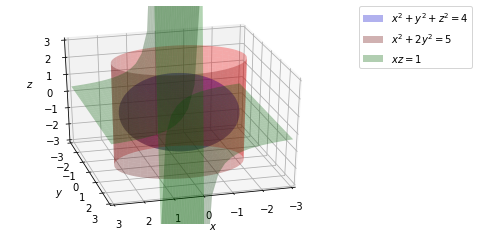

In [131]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# Draw sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x1 = 2 * np.outer(np.cos(u), np.sin(v))
y1 = 2 * np.outer(np.sin(u), np.sin(v))
z1 = 2 * np.outer(np.ones(np.size(u)), np.cos(v))
surf1 = ax.plot_surface(x1, y1, z1, color='b', alpha=0.3, label=r'$x^2 + y^2 + z^2 =4$')

surf1._facecolors2d=surf1._facecolors3d
surf1._edgecolors2d=surf1._edgecolors3d

# Draw cylinder
z2 = np.linspace(-3, 3, 30)
U, z2 = np.meshgrid(u,z2)
x2 = np.sqrt(5) * np.cos(U)
y2 = np.sqrt(5 / 2) * np.sin(U)
surf2 = ax.plot_surface(x2, y2, z2, color='r', alpha=0.3, label=r'$x^2 + 2y^2 = 5$')

surf2._facecolors2d=surf2._facecolors3d
surf2._edgecolors2d=surf2._edgecolors3d

# Draw bilinear
x3 = np.linspace(-3, 3, 30)
y3 = np.linspace(-3, 3, 30)
x3, y3 = np.meshgrid(x3,y3)
z3 = 1 / x3
surf3 = ax.plot_surface(x3, y3, z3, color='g', alpha=0.3, label=r'$xz = 1$')

surf3._facecolors2d=surf3._facecolors3d
surf3._edgecolors2d=surf3._edgecolors3d


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.view_init(30, 75)

In [104]:
from sympy import *
import networkx as nx

In [105]:
x, y, z = symbols('x y z')
eqs = [x**2 + y**2 + z**2 - 4 , x**2 + 2*y**2 - 5, x*z - 1]
print(eqs)

[x**2 + y**2 + z**2 - 4, x**2 + 2*y**2 - 5, x*z - 1]


In [106]:
#Computing Groebner basis
result = groebner(eqs, x, y, z, order='lex')
list(result)

[x + 2*z**3 - 3*z, y**2 - z**2 - 1, 2*z**4 - 3*z**2 + 1]

In [107]:
# Solving the last equation of the Groebner basis for the z variable
z_ans = solve(list(result)[-1], z)
print(z_ans)

[-1, 1, -sqrt(2)/2, sqrt(2)/2]


In [108]:
y_ans = []
for zs in z_ans:
    y_ans.append(solve(list(result)[1].subs(z, zs)))
print(y_ans)
y_ans_1 = np.array([float(item[0].evalf()) for item in y_ans])
y_ans_2 = np.array([float(item[1].evalf()) for item in y_ans])

[[-sqrt(2), sqrt(2)], [-sqrt(2), sqrt(2)], [-sqrt(6)/2, sqrt(6)/2], [-sqrt(6)/2, sqrt(6)/2]]


In [109]:
x_ans = []
# Here we do not need to replace y's since the first element of the Groebner basis only depends on x and z
for zs in z_ans:
    x_ans.append(solve(list(result)[0].subs(z, zs)))
x_ans = [item for sublist in x_ans for item in sublist]
print(x_ans)

[-1, 1, -sqrt(2), sqrt(2)]


The solution to this system of equations is $(x,y,z)=\{ (-1,\pm \sqrt{2}, -1),(1,\pm \sqrt{2}, 1),(-\sqrt{2},\pm \sqrt{6}/2, -\sqrt{2}/2),(\sqrt{2},\pm \sqrt{6}/2, \sqrt{2}/2) \}$

In [110]:
x_ans = np.array([float(item.evalf()) for item in x_ans])
z_ans = np.array([float(item.evalf()) for item in z_ans])
print(x_ans)
print(z_ans)
print(type(x_ans[0]))
print(type(z_ans[0]))

[-1.          1.         -1.41421356  1.41421356]
[-1.          1.         -0.70710678  0.70710678]
<class 'numpy.float64'>
<class 'numpy.float64'>


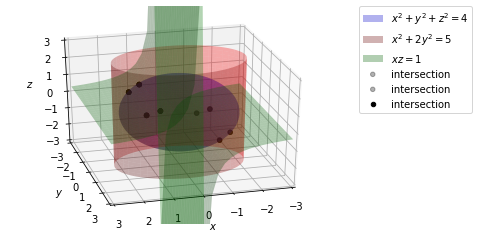

In [130]:

ax.scatter(xs=x_ans,ys=y_ans_1,zs=z_ans,c='k', label='intersection')
ax.scatter(xs=x_ans,ys=y_ans_2,zs=z_ans,c='k')

ax.get_legend().remove()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.canvas.draw()
fig

#### Vertex $k$-coloring of graphs 
Given a graph $\mathcal{G}(V, E)$, where $V$ is the set of vertices and $E$ is the set of edges of $\mathcal{G}$, and a positive integer $k$, we ask if it is possible to assign a color to every vertex from $V$, such that adjacent vertices have different colors assigned. Moreover, if graph $\mathcal{G}$ is $k$–colorable, we would like to enumerate all possible $k$–colorings this graph.

We will solve this problem using the Gröbner bases method. First of all, we have to transform this graph–theoretical definition of $k$–coloring problem into a form that is understandable by the Gröbner bases machinery. This means we have to construct a system of polynomial equations that embeds the structure of a graph and constraints related to the $k$–coloring problem.

We start by assigning a variable to each vertex. Given that $\mathcal{G}$ has $n$ vertices, i.e. $|V| = n$, then we will introduce variables $x_1, \ldots, x_n$. Next we will write a set of equations describing the fact that we allow assignment of one of $k$ possible colors to each vertex. The best approach currently known is to map colors to the $k$–th roots of unity, which are the solutions to the equation $x^k - 1 = 0$.

Let $\zeta = \exp(\frac{2\pi\mathrm{i}}{k})$ be a $k$–th root of unity. We map the colors $1, \ldots, k$ to $1, \zeta, \ldots, \zeta^{k-1}$. Then the statement that every vertex has to be assigned one of $k$ colors is equivalent to writing the following set of polynomial equations:

$$\mathcal{S}_k = \{ x_i^k - 1 = 0 : i = 1, 2, \ldots, n \}$$
We also require that two adjacent vertices $x_i$ and $x_j$ are assigned different colors. From the previous discussion we know that $x_i^k = 1$ and $x_j^k = 1$, so $x_i^k = x_j^k$ or, equivalently, $x_i^k - x_j^k = 0$. By factorization we obtain that:

$$x_i^k - x_j^k = (x_i - x_j) \cdot f(x_i, x_j) = 0$$
where $f(x_i, x_j)$ is a bivariate polynomial of degree $k-1$ in both variables. Since we require that $x_i \not= x_j$ then $x_i^k - x_j^k$ can vanish only when $f(x_i, x_j) = 0$. This allows us to write another set of polynomial equations:

$$\mathcal{S}_{\mathcal{G}} = \{ f(x_i, x_j) = 0 : (i, j) \in E \}$$
Next we combine $\mathcal{S}_k$ and $\mathcal{S}_{\mathcal{G}}$ into one system of equations $\mathcal{S}$. The graph $\mathcal{G}(V, E)$ is $k$-colorable if the Gröbner basis $\mathcal{B}$ of $\mathcal{S}$ is non-trivial, i.e., $\mathcal{B} \not= \{1\}$. If this is not the case, then the graph isn’t $k$–colorable. Otherwise the Gröbner basis gives us information about all possible $k$–colorings of $\mathcal{G}$.

Let’s now focus on a particular $k$–coloring where $k = 3$. In this case:

$$\mathcal{S}_3 = \{ x_i^3 - 1 : i = 1, \ldots, n \}$$
Using SymPy’s built–in multivariate polynomial factorization routine:

In [2]:
var('xi, xj')
factor(xi**3 - xj**3)

(xi - xj)*(xi**2 + xi*xj + xj**2)

we derive the set of equations $\mathcal{S}_{\mathcal{G}}$ describing an admissible $3$–coloring of a graph:

$$\mathcal{S}_{\mathcal{G}} = \{ x_i^2 + x_i x_j + x_j^2 : (i, j) \in E \}$$
At this point it is sufficient to compute the Gröbner basis $\mathcal{B}$ of $\mathcal{S} = \mathcal{S}_3 \cup \mathcal{S}_{\mathcal{G}}$ to find out if a graph $\mathcal{G}$ is $3$–colorable, or not.

Let’s see how this procedure works for a particular graph:



In [4]:
![title](./img/empty_graph.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


$\mathcal{G}(V, E)$ has 12 vertices and 23 edges. We ask if the graph is $3$–colorable. Let’s first encode $V$ and $E$ using Python’s built–in data structures:

In [6]:
V = range(1, 12+1)
E = [(1,2),(2,3),(1,4),(1,6),(1,12),(2,5),(2,7),(3,8),(3,10),(4,11),(4,9),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(5,12),(5,9),(6,10),(7,11),(8,12)]

We encoded the set of vertices as a list of consecutive integers and the set of edges as a list of tuples of adjacent vertex indices. Next we will transform the graph into an algebraic form by mapping vertices to variables and tuples of indices in tuples of variables:

In [7]:
V = [ var('x%d' % i) for i in V ]
E = [ (V[i-1], V[j-1]) for i, j in E ]

As the last step of this construction we write equations for $\mathcal{S}_3$ and $\mathcal{S}_{\mathcal{G}}$:

In [8]:
S3 = [ xi**3 - 1 for xi in V ]
Sg = [ xi**2 + xi*xj + xj**2 for xi, xj in E ]

Everything is set following the theoretical introduction, so now we can compute the Gröbner basis of $\mathcal{S}_3 \cup \mathcal{S}_{\mathcal{G}}$ with respect to lexicographic ordering of terms:

In [10]:
B = groebner(S3 + Sg, *V, order='lex')

We know that if the constructed system of polynomial equations has a solution then $G$ should be non–trivial, which can be easily verified:

In [11]:
B != [1]

True

The answer is that the graph $\mathcal{G}$ is $3$–colorable. A sample coloring is shown on the following figure:

In [12]:
![title](./img/full_graph.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


Suppose we add an edge between vertices $i = 3$ and $j = 4$. Is the new graph still $3$–colorable? To check this it is sufficient to construct $\mathcal{S}_{\mathcal{G'}}$ by extending $\mathcal{S}_{\mathcal{G}}$ with $x_3^2 + x_3 x_4 + x_4^2$ and recomputing the Gröbner basis:

In [13]:
groebner(S3 + Sg + [x3**2 + x3*x4 + x4**2], *V, order='lex')

GroebnerBasis([1], x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, domain='ZZ', order='lex')

Let’s return to the original graph. We already know that it is $3$–colorable, but now we would like to enumerate all colorings. We will start from revising properties of roots of unity. Let’s construct the $k$–th root of unity, where $k = 3$, in algebraic number form:

In [55]:
var('x')
unityroots = roots(x**3 - 1, multiple=True)
unityroots

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

Let’s declare three variables which will nicely represent colors in the $3$–coloring problem and let’s put together, in an arbitrary but fixed order, those variables and the previously computed roots of unity:

In [59]:
colorvars = var('red,green,blue')

This gives as a mapping between algebra of $3$–coloring problem and a nice visual representation, which we will take advantage of later.

Let’s solve the Gröbner basis $\mathcal{B}$:

In [43]:
colorings = solve(B, *V)

In [44]:
len(colorings)

6

This confirms that there are six solutions. At this point we could simply print the computed solutions to see what are the admissible $3$–colorings. This is, however, not a good idea, because we use algebraic numbers (roots of unity) for representing colors and `solve()` returned solutions in terms of those algebraic numbers, possibly even in a non–simplified form.

In [60]:
print(colorings)

[(1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2), (1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2), (-1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2), (-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1), (-1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, 1, -1/2 - sqrt(3)*I/2), (-1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, 1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 1, -1/2 + sqrt(3)*I/2, -1/2 - sqrt(3)*I/2,

To overcome this difficulty we will use previously defined mapping between roots of unity and literal colors and substitute symbols for numbers:

In [64]:
for coloring in colorings:
    list = [color.expand(complex=True).subs(zip(unityroots, colorvars)) for color in coloring]
    print(list)

[red, green, -green - 1, -green - 1, red, green, -green - 1, red, green, red, green, -green - 1]
[red, -green - 1, green, green, red, -green - 1, green, red, -green - 1, red, -green - 1, green]
[green, red, -green - 1, -green - 1, green, red, -green - 1, green, red, green, red, -green - 1]
[green, -green - 1, red, red, green, -green - 1, red, green, -green - 1, green, -green - 1, red]
[-green - 1, red, green, green, -green - 1, red, green, -green - 1, red, -green - 1, red, green]
[-green - 1, green, red, red, -green - 1, green, red, -green - 1, green, -green - 1, green, red]


This is the result we were looking for (sort of, since `-green-1=1/2 + sqrt(3)*I/2 - 1 = -1/2 + sqrt(3)*I/2 = blue`), but a few words of explanation are needed. `solve()` may return unsimplified results so we may need to simplify any algebraic numbers that don’t match structurally the precomputed roots of unity. Taking advantage of the domain of computation, we use the complex expansion algorithm for this purpose (`expand(complex=True)`). Once we have the solutions in this canonical form, to get this nice visual form with literal colors it is sufficient to substitute color variables for roots of unity.